### autogen+kimi一个基本格式示范

In [ ]:
from autogen import AssistantAgent, UserProxyAgent
import os

llm_config = {
    "model": "moonshot-v1-8k",  # 使用特定模型
    "api_key": "KimiApikey",  # 请替换为你的API密钥
    "base_url": "https://api.moonshot.cn/v1"
}
assistant = AssistantAgent("assistant", llm_config=llm_config)
user_proxy = UserProxyAgent("user_proxy", code_execution_config=False)

# Start the chat
user_proxy.initiate_chat(
    assistant,
    message="Tell me a joke about NVDA and TESLA stock prices.",
)

### 一个可供参考的groupchat示例：挂号

In [ ]:
from autogen import ConversableAgent, GroupChatManager, GroupChat
# 患者代理
user_agent = ConversableAgent(
   name="liming",
   human_input_mode="ALWAYS",
   system_message='你是一个人类，姓名：李明，25岁，男，昨天打球时脚崴了',
)

# 挂号代理
registered_agent = ConversableAgent(
    name="registered",
    system_message="你是医院的挂号系统，患者来到医院，引导患者完成挂号。需要根据患者选择的科室推荐对应科室的医生及收费情况，当患者选择对应医生并且输入对应医生的挂号费用时，告诉患者:挂号完成，并可前往诊室候诊 ",
    llm_config=llm_config,
    human_input_mode="NEVER",
    function_map={
        "get_doctor_info": get_doctor_info
    }
)

# 医生代理，可以创建多个
doctor_zhao_agent = ConversableAgent(
    name="doctor_zhao",
    system_message="你是一名骨科医生，名字赵六，只接收挂号完成的患者，应该介绍自己然后询问患者病情，根据患者病情给予合适的治疗方案,并开具对应的药品处方",
    llm_config=llm_config,
    human_input_mode="NEVER"
)

# 药房代理
medicine_agent = ConversableAgent(
    name="medicine_store",
    system_message="你是一名药房管理员，根据用户的处方及缴费信息给用户出售对应的药品，当用户未缴费时提醒用户先去缴费窗口进行缴费",
    llm_config=llm_config,
    human_input_mode="NEVER"
)

# 收费代理
cashier_agent = ConversableAgent(
    name="cashier",
    system_message="你是一名药品收费员，根据用户的处方收取对应药品的费用，当用户输入费用时,代表用户缴费完成,并开具收据，提醒用户取药房取药",
    llm_config=llm_config,
    human_input_mode="NEVER"
)
registered_agent.register_for_llm(name="get_doctor_info", description="获取医生信息")(get_doctor_info)

group_chat = GroupChat(
    agents=[user_agent, registered_agent, doctor_li_agent, doctor_zhao_agent, medicine_agent, cashier_agent],
    messages=[],
    max_round=30,
    send_introductions=True
)

group_chat_manager = GroupChatManager(
    groupchat=group_chat,
    llm_config={"config_list": config.config_list},
)

user_agent.initiate_chat(
    group_chat_manager,
    message="你好,我的脚受伤了",
    summary_method="last_msg",
    silent=True
)

### llm 读取本地pdf文件

In [2]:
from pathlib import Path
from openai import OpenAI
 
client = OpenAI(
    api_key="sk-CcZFizKth6qZmN3dYJiCBbMsJOnOtHHbiaI07AGKxEJfHGS5",  # 请替换为你的API密钥
    base_url="https://api.moonshot.cn/v1",
)
 
# 定义一个示例文件
file_object = client.files.create(file=Path("/Users/mark/Desktop/Paul_Kenny.pdf"), purpose="file-extract")
 
# 获取结果
file_content = client.files.content(file_id=file_object.id).text
 
# 把它放进请求中
messages = [
    {
        "role": "system",
        "content": "你是一名translate agent, 你会用中文完整翻译读取的论文，并不会改变原文内容与结构",
    },
    {
        "role": "system",
        "content": file_content,
    },
    {"role": "user", "content": "请翻译THE THEORY OF OPTIMUM CURRENCY AREAS"},
]
 
# 然后调用 chat-completion, 获取 Kimi 的回答
completion = client.chat.completions.create(
  model="moonshot-v1-128k",
  messages=messages,
  temperature=0,
)
print(completion.choices[0].message)
output_file_path = "/Users/mark/Desktop/翻译.txt"
with open(output_file_path, "w") as output_file:
    output_file.write(str(completion.choices[0].message))  # 将对象转换为字符串

print(f"内容报告已保存至 {output_file_path}")

ChatCompletionMessage(content='最优货币区域理论\n\n保罗·肯尼\n\n在保罗看来，理论是为了被打破，或者至少是受到质疑而存在的。基于证据，他提出了一个逻辑上的案例，反对蒙代尔最优货币区域理论的持续相关性，特别是挑战其作为评估欧洲货币联盟（EMU）的手段。引言\n最优货币区域理论由罗伯特·蒙代尔在1961年首次提出。该理论构思于布雷顿森林体系下的固定国际汇率制度时期，蒙代尔提出，只要固定汇率和僵化的工资与价格水平阻止了贸易条件在调整过程中发挥自然作用，那么国际经济体系中的支付平衡失衡将始终是“一个不可分割的特征”。广义上讲，蒙代尔的理论主张一个由许多自由浮动货币组成的系统，围绕所谓的最优货币区域组织——他将其定义为“区域”。由于围绕任何基础组织货币的不切实际性，除了民族国家之外，最优货币理论只有有限的实际应用，特别是对于打算形成货币联盟的国家或其他处于转型状态的经济体。因此，蒙代尔的论文常常构成分析货币联盟成本和收益的基础，这是实践中创建货币联盟最清晰的例子，即欧洲货币联盟（EMU）。首先应该明确的是，在本文中，我不打算根据OCA（最优货币区域）提出货币联盟的成本和收益分析；我也不打算解决欧洲联盟是否构成最优货币区域的问题，而是质疑最优货币区域理论（OCA）本身的有效性。在首先概述了蒙代尔（1961年）的模型之后，我将展示OCA由于其在静态环境中的根源而根本上存在缺陷。我质疑蒙代尔早期理论中的核心假设，即汇率灵活性是调整不对称冲击最有效的方式，并且无论如何都要挑战这种冲击的相关性。我得出的结论是，应该寻找新的分析措施，评估货币联盟的更大经济影响，而不是目前研究基础上的狭隘的成本效益分析。\n\n最优货币区域理论（蒙代尔 1961年）\n蒙代尔的理论（1961年）是基于当时普遍的凯恩斯主义信念，即国家货币和财政政策能够管理总需求并抵消供给侧冲击（麦金农 2000年）。蒙代尔原始论文（1961年）的目标是阐明一个理论，即对于国家来说，是采用灵活汇率制度还是完全固定汇率制度更为可取。从这个讨论中，他提出了一个问题，是否存在一个理想或最优的领域，应该在其中固定汇率。他将这个领域称为最优货币区域。蒙代尔的最终结论，除了一些例外情况，似乎是反对固定汇率制度的想法，主张围绕“区域”自由浮动的汇率。蒙代尔使用一个简单的模型来演示他的理论，该模型包含两

## 基本思路
research agent：读取本地pdf并生成内容报告并发送给latex agent（包含背景和重要性，研究问题和目标，解决研究问题的方法或模型，文章模型推导过程的详细梳理，主要结果，文章的实际意义，结论）

latex agent：学习内容报告，生产一份报告的latex beamer文件

report agent：根据beamer文件生成一份演讲文稿

group manager：中转发送消息并反馈修改意见
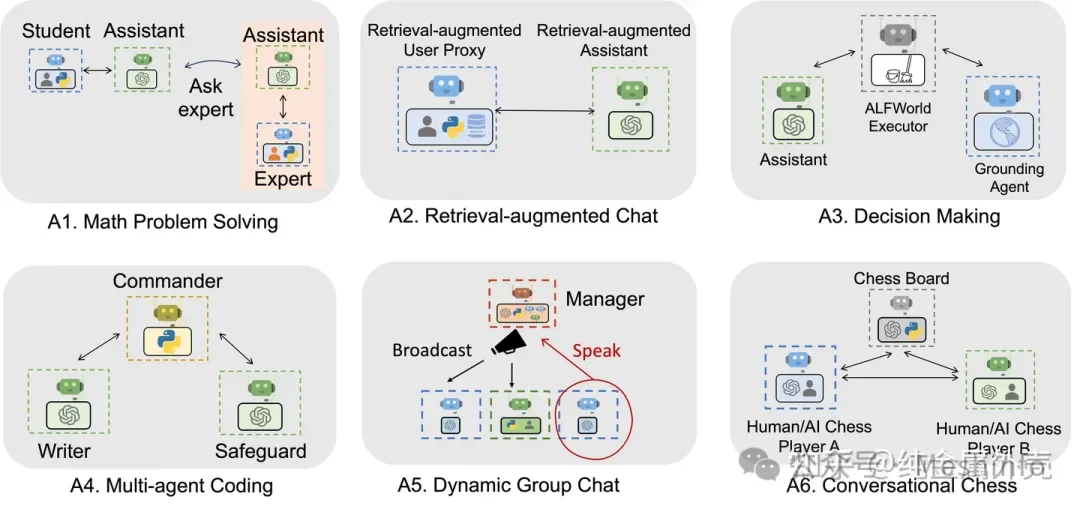

In [4]:
import os
from pathlib import Path
from autogen import ConversableAgent, GroupChat, GroupChatManager

In [13]:
# 定义API和模型配置
llm_config = {
    "model": "moonshot-v1-128k",
    "api_key": "sk-CcZFizKth6qZmN3dYJiCBbMsJOnOtHHbiaI07AGKxEJfHGS5",  # 请替换为你的API密钥
    "base_url": "https://api.moonshot.cn/v1"
}

# 创建Agents

read_agent = ConversableAgent(
    name="read_Agent",
    system_message="你是read agent，你会根据原文完成一篇1000字左右中文读书笔记，你应该以完整的文本输出文章，而非分为多点分别阐述",
    llm_config=llm_config,
    human_input_mode="NEVER"
)

Academic_agent = ConversableAgent(
    name="Academic_Agent",
    system_message="你是一名Academic_Agent, 你会检查read_Agent撰写的报告的是否以完整的文字形式呈现，请阻止他输出分点的文章，检查文字准确性与通畅性，并反馈修改意见给read_Agent",
    llm_config=llm_config,
    human_input_mode="NEVER"
)


In [14]:
# 创建GroupChat
group_chat_with_introductions = GroupChat(
    agents=[read_agent, Academic_agent],
    messages=[],
    max_round=5,
    send_introductions=False,
)

# 创建GroupChatManager
group_chat_manager = GroupChatManager(
    groupchat=group_chat_with_introductions,
    llm_config=llm_config
)

In [16]:
# 读取本地论文
file_object = client.files.create(file=Path("/Users/mark/Desktop/Paul_Kenny.pdf"), purpose="file-extract")
 
# 获取结果
file_content = client.files.content(file_id=file_object.id).text

In [17]:
chat_result = group_chat_manager.initiate_chat(
    read_agent,
    message=file_content,
    summary_method="reflection_with_llm",
)

chat_manager (to read_Agent):

{"content":"Student Economic Review, Vol. 17, 2003, pp. 137-149\n137\n THE THEORY OF OPTIMUM CURRENCY AREAS PAUL KENNY In Paul’s view, theories are made to be broken, or at least called into question. Based on the evidence, he presents a logical case against the continued relevance of Mundell’s theory of optimum currency areas, and in particular challenges its use as means of assessment of European Monetary Union. Introduction The theory of Optimum Currency Areas was pioneered by Robert Mundell in 1961. Conceived during the Breton Woods system of fixed international exchange rates, it was Mundell’s proposition that balance-of-payments disequilibria would remain “an integral feature of the international economic system as long as fixed exchange rates and rigid wage and price levels prevent the terms of trade from fulfilling a natural role in the adjustment process”. Broadly speaking, Mundell’s theory advocated a system of many freely floating currencies or

GroupChat is underpopulated with 2 agents. Consider setting speaker_selection_method to 'round_robin' or allow_repeat_speaker to False, or use direct communication, unless repeated speaker is desired.


Academic_Agent (to chat_manager):

read_Agent撰写的报告已经以完整的文字形式呈现，没有使用分点的形式。报告的内容准确性和通畅性都较高，对Paul Kenny在《Student Economic Review》上发表的文章进行了详细的概述和分析。报告中提到了Kenny对OCA理论的五个主要批判点，并对每个批判点进行了解释和讨论。

以下是对read_Agent报告的一些修改意见：

1. **引入背景信息**：在报告的开头，可以简要介绍OCA理论的背景，包括它在经济学中的重要性和历史发展，以便读者更好地理解Kenny的批判。

2. **明确批判的针对性**：在讨论Kenny的批判时，可以更明确地指出他是在针对OCA理论的哪些具体假设或结论进行批判，以增强报告的针对性。

3. **提供更多实证研究的例子**：在讨论Kenny对实证研究的批判时，可以提供一些具体的实证研究例子，以展示Kenny的观点。

4. **讨论Kenny的建议**：在报告的结尾，可以更详细地讨论Kenny对未来研究的建议，以及这些建议如何可能影响对货币联盟的评估。

5. **语言和风格**：报告的语言和风格已经很好，但可以在某些地方使用更简洁的表达，以提高报告的可读性。

总的来说，read_Agent的报告已经很好地概述了Kenny对OCA理论的批判，并对每个批判点进行了详细的分析。通过上述修改意见，报告的质量和深度可以进一步提高。

--------------------------------------------------------------------------------


GroupChat is underpopulated with 2 agents. Consider setting speaker_selection_method to 'round_robin' or allow_repeat_speaker to False, or use direct communication, unless repeated speaker is desired.


Academic_Agent (to chat_manager):

read_Agent的报告已经以完整的文字形式呈现，没有使用分点的形式。报告的内容准确性和通畅性都较高，对Paul Kenny在《Student Economic Review》上发表的文章进行了详细的概述和分析。报告中提到了Kenny对OCA理论的五个主要批判点，并对每个批判点进行了解释和讨论。

以下是对read_Agent报告的一些修改意见：

1. **引入背景信息**：在报告的开头，可以简要介绍OCA理论的背景，包括它在经济学中的重要性和历史发展，以便读者更好地理解Kenny的批判。

2. **明确批判的针对性**：在讨论Kenny的批判时，可以更明确地指出他是在针对OCA理论的哪些具体假设或结论进行批判，以增强报告的针对性。

3. **提供更多实证研究的例子**：在讨论Kenny对实证研究的批判时，可以提供一些具体的实证研究例子，以展示Kenny的观点。

4. **讨论Kenny的建议**：在报告的结尾，可以更详细地讨论Kenny对未来研究的建议，以及这些建议如何可能影响对货币联盟的评估。

5. **语言和风格**：报告的语言和风格已经很好，但可以在某些地方使用更简洁的表达，以提高报告的可读性。

总的来说，read_Agent的报告已经很好地概述了Kenny对OCA理论的批判，并对每个批判点进行了详细的分析。通过上述修改意见，报告的质量和深度可以进一步提高。

--------------------------------------------------------------------------------


GroupChat is underpopulated with 2 agents. Consider setting speaker_selection_method to 'round_robin' or allow_repeat_speaker to False, or use direct communication, unless repeated speaker is desired.


read_Agent (to chat_manager):

Paul Kenny在《Student Economic Review》上发表的文章对Robert Mundell提出的最优货币区域（OCA）理论进行了深入的批判性分析。文章首先回顾了OCA理论的历史背景和基本假设，然后逐一指出了该理论的不足之处，并提出了对欧洲货币联盟（EMU）评估的新视角。

Kenny认为，OCA理论的局限性在于其基于静态环境的分析，忽略了经济动态性。他质疑了Mundell关于汇率灵活性作为调整非对称冲击的最有效手段的中心假设，并挑战了这种冲击的相关性。Kenny指出，OCA理论未能充分考虑货币联盟的网络效应，如货币的规模经济和资本市场的整合，这些因素可能使货币联盟更具吸引力。

文章还批判了OCA理论在实证研究中的不足，认为由于缺乏对“区域”的精确定义，这些研究结果往往是任意的，并且不足以支持OCA理论。Kenny强调，货币联盟不仅仅是经济成本和收益的简单计算，它还是政治统一的手段，因此评估货币联盟的成本和收益时，应该考虑更广泛的经济影响。

Kenny建议，未来的研究应该寻找新的分析方法，以更全面地评估货币联盟的经济影响。他认为，尽管OCA理论在分析货币联盟时提供了一定的框架，但其在动态环境中的不足和对非对称冲击的过度强调限制了其实用性。

总的来说，Kenny的文章提供了对OCA理论的全面批判，并提出了对货币联盟评估的新视角。他的观点挑战了传统的经济理论，并为未来的研究提供了新的方向。

--------------------------------------------------------------------------------


GroupChat is underpopulated with 2 agents. Consider setting speaker_selection_method to 'round_robin' or allow_repeat_speaker to False, or use direct communication, unless repeated speaker is desired.


Academic_Agent (to chat_manager):

read_Agent的报告已经以完整的文字形式呈现，没有使用分点的形式。报告的内容准确性和通畅性都较高，对Paul Kenny在《Student Economic Review》上发表的文章进行了详细的概述和分析。报告中提到了Kenny对OCA理论的五个主要批判点，并对每个批判点进行了解释和讨论。

以下是对read_Agent报告的一些修改意见：

1. **引入背景信息**：在报告的开头，可以简要介绍OCA理论的背景，包括它在经济学中的重要性和历史发展，以便读者更好地理解Kenny的批判。

2. **明确批判的针对性**：在讨论Kenny的批判时，可以更明确地指出他是在针对OCA理论的哪些具体假设或结论进行批判，以增强报告的针对性。

3. **提供更多实证研究的例子**：在讨论Kenny对实证研究的批判时，可以提供一些具体的实证研究例子，以展示Kenny的观点。

4. **讨论Kenny的建议**：在报告的结尾，可以更详细地讨论Kenny对未来研究的建议，以及这些建议如何可能影响对货币联盟的评估。

5. **语言和风格**：报告的语言和风格已经很好，但可以在某些地方使用更简洁的表达，以提高报告的可读性。

总的来说，read_Agent的报告已经很好地概述了Kenny对OCA理论的批判，并对每个批判点进行了详细的分析。通过上述修改意见，报告的质量和深度可以进一步提高。

--------------------------------------------------------------------------------
